# Slope extrapolation

In [1]:
import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywsra
import scipy
import xarray as xr
import littlebuoybigwaves as buoy

import plotting

from configure import read_stored_variable

## Setup

In [2]:
# %run 'nb1-transform.ipynb'
%run -i configure.py

earl_merged_ds = read_stored_variable('earl_merged_ds')
fiona_merged_ds = read_stored_variable('fiona_merged_ds')
ian_merged_ds = read_stored_variable('ian_merged_ds')
# julia_merged_ds = read_stored_variable('julia_merged_ds')
idalia_merged_ds = read_stored_variable('idalia_merged_ds')
lee_merged_ds = read_stored_variable('lee_merged_ds')
atomic_merged_ds = read_stored_variable('atomic_merged_ds')

earl_drifter_df = read_stored_variable('earl_drifter_df')
fiona_drifter_df = read_stored_variable('fiona_drifter_df')
ian_drifter_df = read_stored_variable('ian_drifter_df')
idalia_drifter_df = read_stored_variable('idalia_drifter_df')
lee_drifter_df = read_stored_variable('lee_drifter_df')
atomic_swift_ds = read_stored_variable('atomic_swift_ds')

earl_best_track = read_stored_variable('earl_best_track')
fiona_best_track = read_stored_variable('fiona_best_track')
ian_best_track = read_stored_variable('ian_best_track')
# julia_best_track = read_stored_variable('julia_best_track')
idalia_best_track = read_stored_variable('idalia_best_track')
lee_best_track = read_stored_variable('lee_best_track')

plotting.configure_figures()

## By storm

In [3]:
def case_study_title(wsra_ds):
    storm_name = plotting.get_storm_label(wsra_ds.attrs['storm_name'])
    start_time = wsra_ds['time'].min().dt.floor('60S')
    end_time = wsra_ds['time'].max().dt.ceil('60S')
    title = (
        f"{storm_name} \n"
        f"{start_time.dt.strftime('%Y-%m-%d %H:%M').values} "
        f"to {end_time.dt.strftime('%H:%M').values} (UTC)"
    )
    return title

def case_study_filename(wsra_ds, subtitle=None):
    if subtitle is None:
        subtitle = ''

    storm_name = wsra_ds.attrs['storm_name']
    start_time = wsra_ds['time'].min().dt.floor('60S')
    end_time = wsra_ds['time'].max().dt.ceil('60S')
    title = (
        f"{storm_name}_"
        f"{subtitle}"
        f"{start_time.dt.strftime('%Y-%m-%d_%H:%MZ').values}_"
        f"to_{end_time.dt.strftime('%H:%MZ').values}"
    )
    return title


### ATOMIC (2020)

In [4]:
atomic_case_studies = {
    'case_1': slice(pd.Timestamp('2020-01-19 17:30:00'),
                    pd.Timestamp('2020-01-19 18:00:00')),
    'case_2': slice(pd.Timestamp('2020-01-19 17:50:00'),
                    pd.Timestamp('2020-01-19 19:15:00')),
    'case_3': slice(pd.Timestamp('2020-01-31 18:00:00'),
                    pd.Timestamp('2020-01-31 19:00:00')),
    'case_4': slice(pd.Timestamp('2020-01-31 18:40:00'),
                    pd.Timestamp('2020-01-31 19:10:00')),
    'case_5': slice(pd.Timestamp('2020-02-03 16:00:00'),
                    pd.Timestamp('2020-02-03 17:00:00')),
    'case_6': slice(pd.Timestamp('2020-02-03 16:50:00'),
                    pd.Timestamp('2020-02-03 18:00:00')),
}
atomic_subset_1_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_1'])
atomic_subset_2_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_2'])
atomic_subset_3_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_3'])
atomic_subset_4_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_4'])
atomic_subset_5_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_5'])
atomic_subset_6_ds = atomic_merged_ds.sel(time=atomic_case_studies['case_6'])

In [5]:
# start_time = pd.Timestamp('2020-01-19 17:30:00')
# end_time = pd.Timestamp('2020-02-09 09:00:00')
# atomic_subset_ds = atomic_merged_ds.sel(time=slice(start_time, end_time))

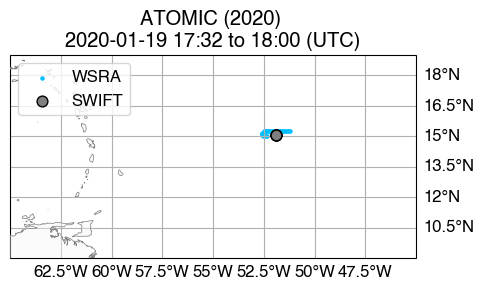

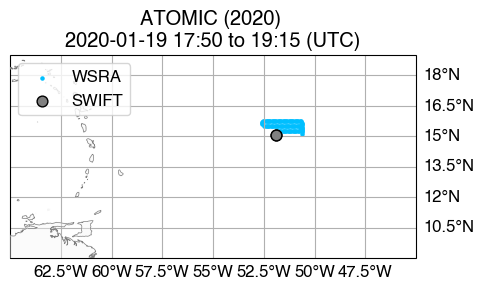

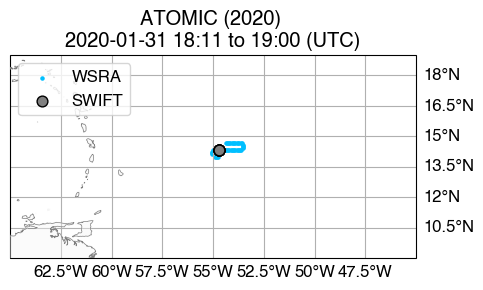

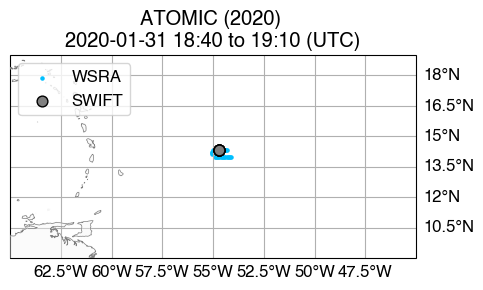

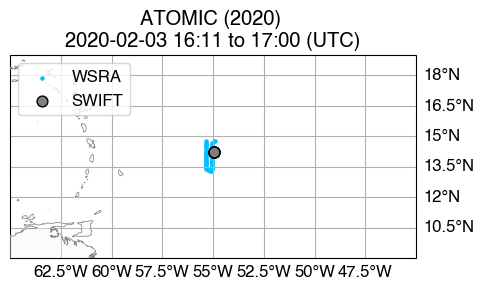

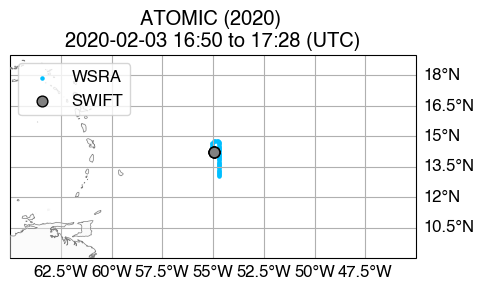

In [6]:
FIG_SIZE = (5, 5)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-65, -45, 9, 19])
CRS = cartopy.crs.PlateCarree()

FIG_TITLE = case_study_filename(atomic_subset_1_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_1_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_1_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_1_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(atomic_subset_2_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_2_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_2_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_2_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(atomic_subset_3_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_3_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_3_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_3_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(atomic_subset_4_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_4_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_4_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_4_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()


FIG_TITLE = case_study_filename(atomic_subset_5_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_5_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_5_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_5_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()


FIG_TITLE = case_study_filename(atomic_subset_6_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_wsra_track(atomic_subset_6_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(atomic_subset_6_ds, drifter_type='swift', ax=ax)
ax.set_title(case_study_title(atomic_subset_6_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

### Ian (2022)

In [7]:
ian_case_studies = {
    'case_1': slice(pd.Timestamp('2022-09-28 11:00:00'),
                    pd.Timestamp('2022-09-28 11:10:00')),
    'case_2': slice(pd.Timestamp('2022-09-28 11:20:00'),
                    pd.Timestamp('2022-09-28 11:45:00')),
}
ian_subset_1_ds = ian_merged_ds.sel(time=ian_case_studies['case_1'])
ian_subset_2_ds = ian_merged_ds.sel(time=ian_case_studies['case_2'])

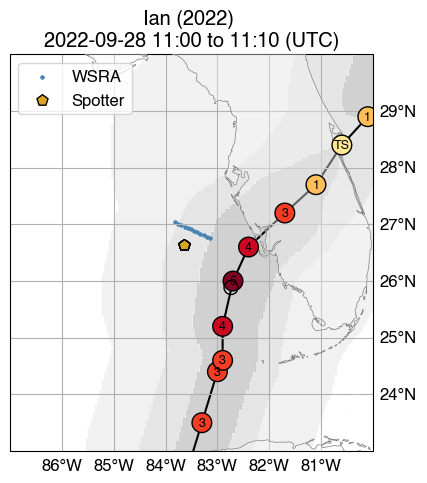

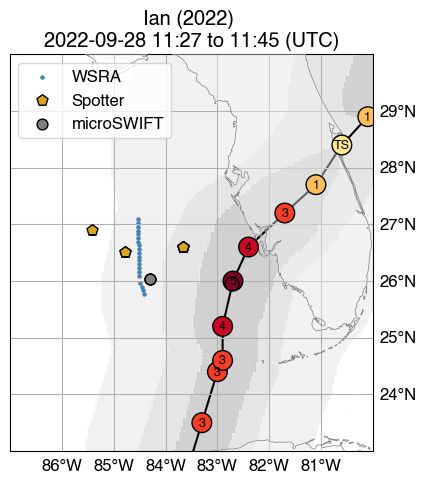

In [14]:
#TODO: need to indicate location of eye

FIG_SIZE = (5, 5)
IMAGE_RESOLUTION = 150
IMAGE_FILE_TYPE = 'png'
EXTENT = np.array([-87, -80, 23, 30])
CRS = cartopy.crs.PlateCarree()

FIG_TITLE = case_study_filename(ian_subset_1_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_storm_center(ian_subset_1_ds, ax)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*ian_best_track, ax=ax)
plotting.plot_wsra_track(ian_subset_1_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(ian_subset_1_ds, drifter_type='spotter', ax=ax)
# plotting.plot_colocated_drifter(ian_subset_1_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(ian_subset_1_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(ian_subset_2_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_storm_center(ian_subset_2_ds, ax)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*ian_best_track, ax=ax)
plotting.plot_wsra_track(ian_subset_2_ds, ax=ax, label='WSRA')
plotting.plot_colocated_drifter(ian_subset_2_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(ian_subset_2_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(ian_subset_2_ds))
fig.tight_layout()
ax.legend(loc='upper left')
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

### Idalia (2023)

In [12]:
idalia_case_studies = {
    'case_1': slice(pd.Timestamp('2023-08-30 00:50:00'),
                    pd.Timestamp('2023-08-30 01:10:00')),
    'case_2': slice(pd.Timestamp('2023-08-30 02:35:00'),
                    pd.Timestamp('2023-08-30 02:45:00')),
    'case_3': slice(pd.Timestamp('2023-08-29 21:10:00'),
                    pd.Timestamp('2023-08-29 21:25:00')),
    'case_4': slice(pd.Timestamp('2023-08-29 23:20:00'),
                    pd.Timestamp('2023-08-29 23:35:00')),
    'case_5': slice(pd.Timestamp('2023-08-30 01:30:00'),
                    pd.Timestamp('2023-08-30 01:40:00')),
}
idalia_subset_1_ds = idalia_merged_ds.sel(time=idalia_case_studies['case_1'])
idalia_subset_2_ds = idalia_merged_ds.sel(time=idalia_case_studies['case_2'])
idalia_subset_3_ds = idalia_merged_ds.sel(time=idalia_case_studies['case_3'])
idalia_subset_4_ds = idalia_merged_ds.sel(time=idalia_case_studies['case_4'])
idalia_subset_5_ds = idalia_merged_ds.sel(time=idalia_case_studies['case_5'])

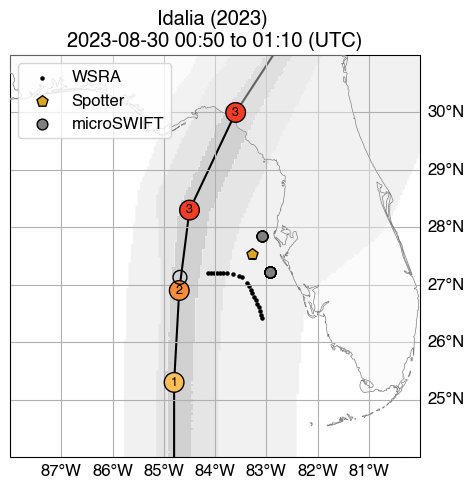

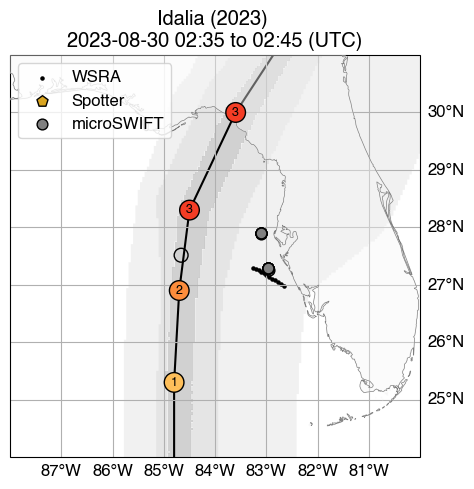

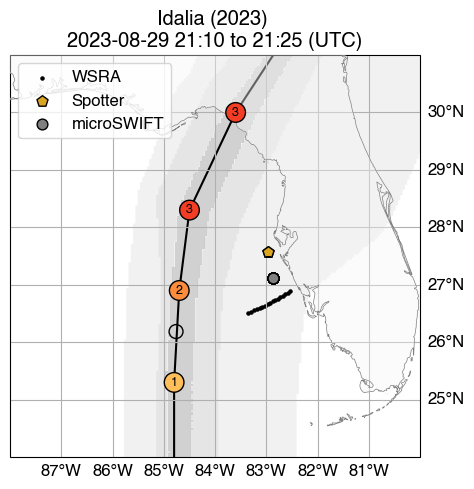

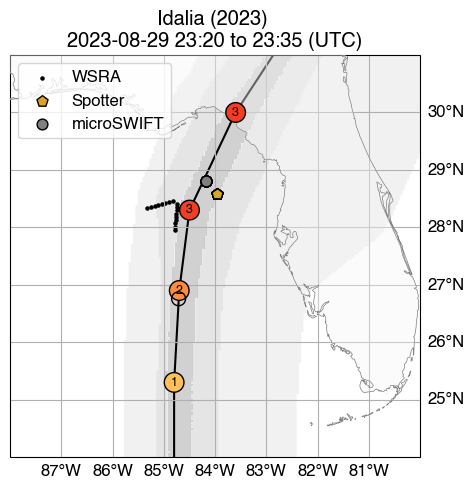

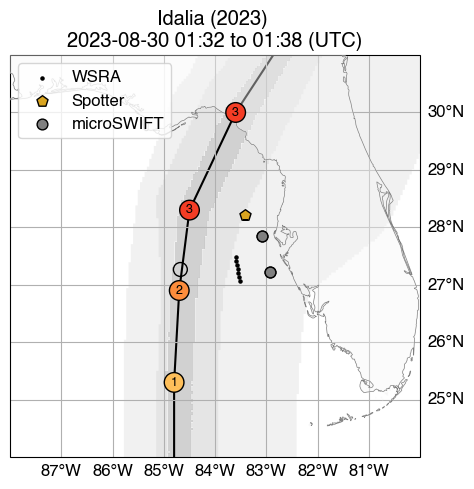

In [13]:
FIG_SIZE = (5, 5)
IMAGE_RESOLUTION = 300
IMAGE_FILE_TYPE = 'png'
# EXTENT = np.array([-90, -80, 17, 31])
EXTENT = np.array([-88, -80, 24, 31])
CRS = cartopy.crs.PlateCarree()

FIG_TITLE = case_study_filename(idalia_subset_1_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_storm_center(idalia_subset_1_ds, ax)
plotting.plot_wsra_track(idalia_subset_1_ds, ax=ax, color='k', label='WSRA')
plotting.plot_colocated_drifter(idalia_subset_1_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_subset_1_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(idalia_subset_1_ds))
ax.legend(loc='upper left', frameon=True)
fig.tight_layout()
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(idalia_subset_2_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_storm_center(idalia_subset_2_ds, ax)
plotting.plot_wsra_track(idalia_subset_2_ds, ax=ax, color='k', label='WSRA')
plotting.plot_colocated_drifter(idalia_subset_2_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_subset_2_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(idalia_subset_2_ds))
ax.legend(loc='upper left', frameon=True)
fig.tight_layout()
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(idalia_subset_3_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_storm_center(idalia_subset_3_ds, ax)
plotting.plot_wsra_track(idalia_subset_3_ds, ax=ax, color='k', label='WSRA')
plotting.plot_colocated_drifter(idalia_subset_3_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_subset_3_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(idalia_subset_3_ds))
ax.legend(loc='upper left', frameon=True)
fig.tight_layout()
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(idalia_subset_4_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_storm_center(idalia_subset_4_ds, ax)
plotting.plot_wsra_track(idalia_subset_4_ds, ax=ax, color='k', label='WSRA')
plotting.plot_colocated_drifter(idalia_subset_4_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_subset_4_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(idalia_subset_4_ds))
ax.legend(loc='upper left', frameon=True)
fig.tight_layout()
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

FIG_TITLE = case_study_filename(idalia_subset_5_ds, subtitle='case_study_map_')
fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
plotting.plot_base_chart(ax, extent=EXTENT)
plotting.plot_best_track(*idalia_best_track, ax=ax)
plotting.plot_storm_center(idalia_subset_5_ds, ax)
plotting.plot_wsra_track(idalia_subset_5_ds, ax=ax, color='k', label='WSRA')
plotting.plot_colocated_drifter(idalia_subset_5_ds, drifter_type='spotter', ax=ax)
plotting.plot_colocated_drifter(idalia_subset_5_ds, drifter_type='microswift', ax=ax)
ax.set_title(case_study_title(idalia_subset_5_ds))
ax.legend(loc='upper left', frameon=True)
fig.tight_layout()
fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)
plt.show()

## Spectral tail extrapolation

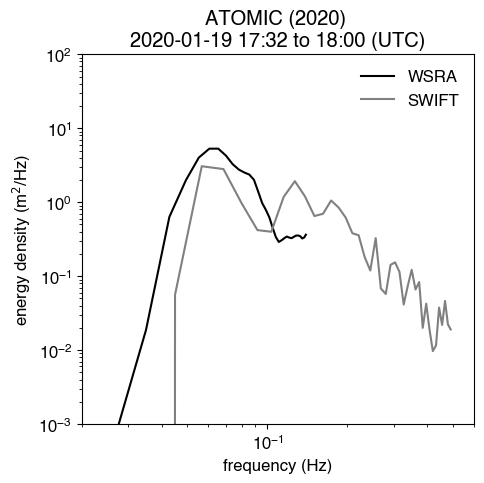

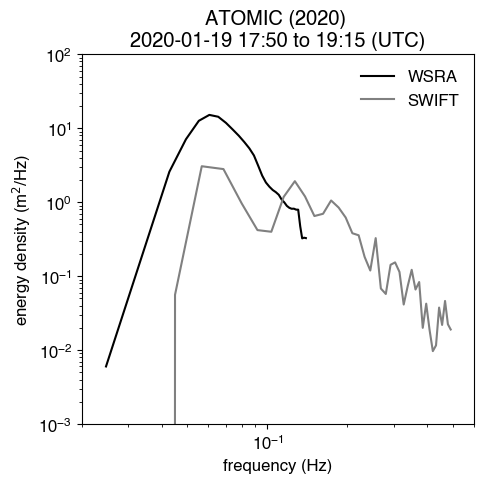

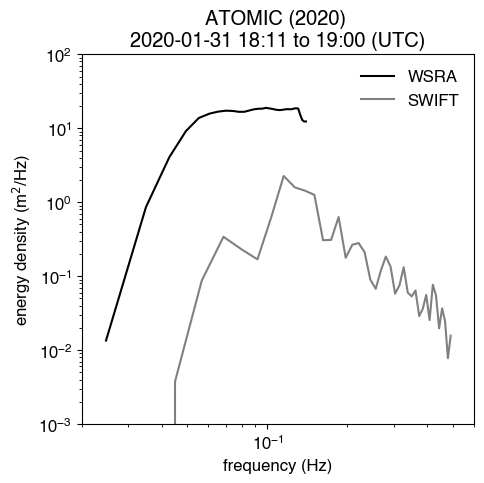

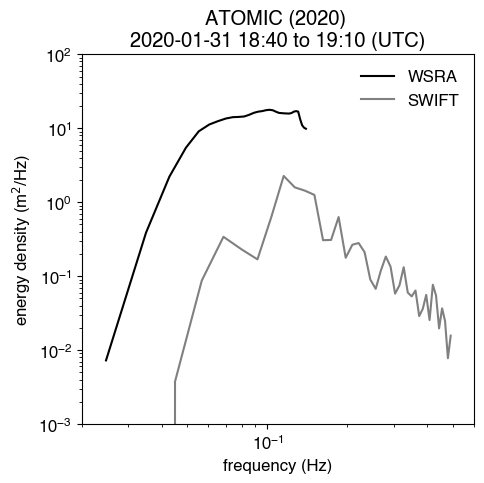

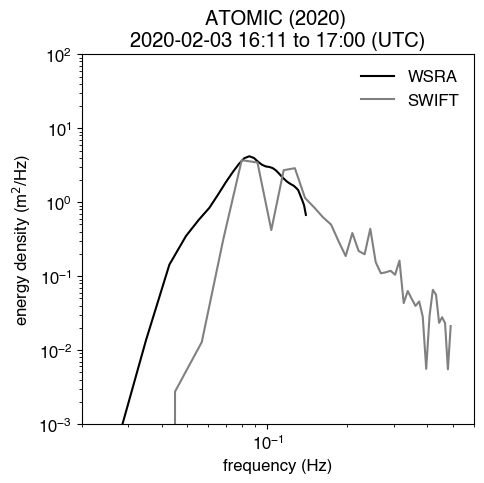

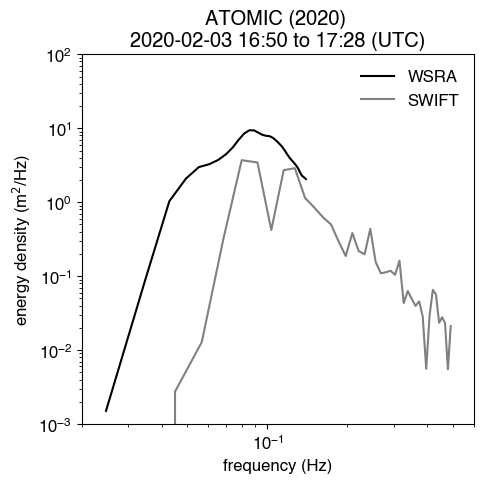

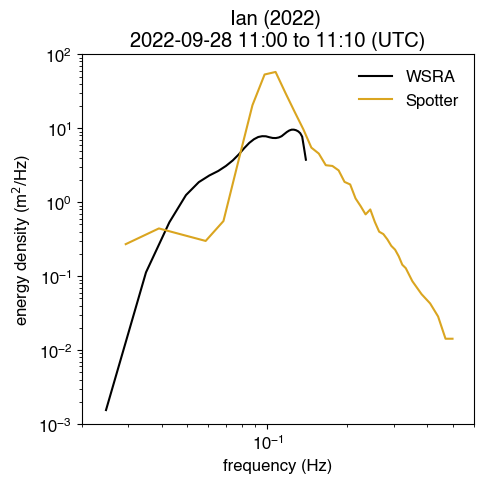

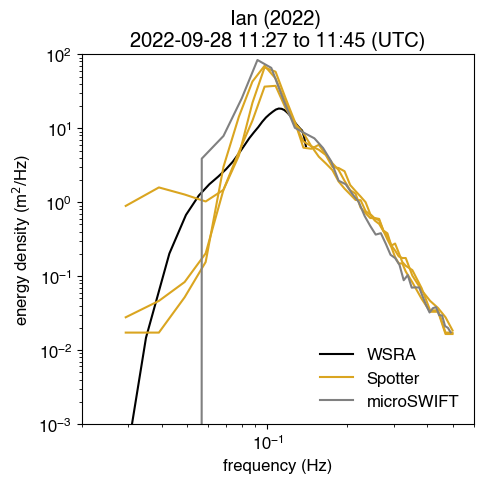

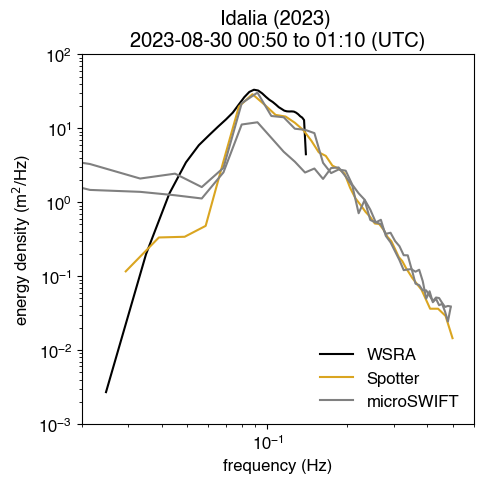

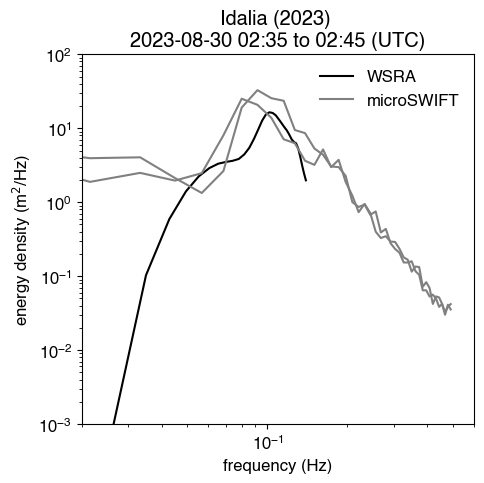

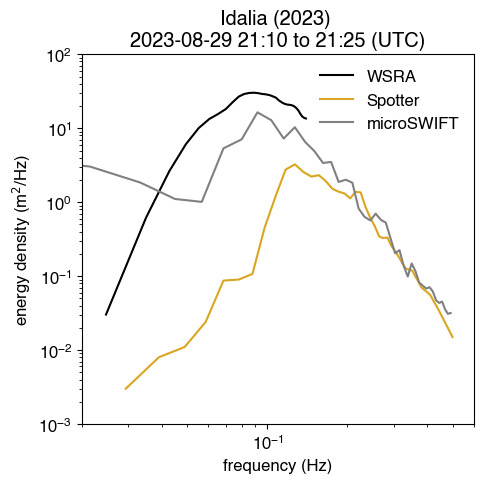

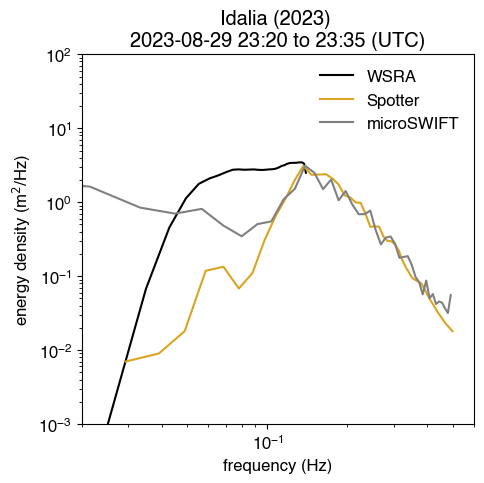

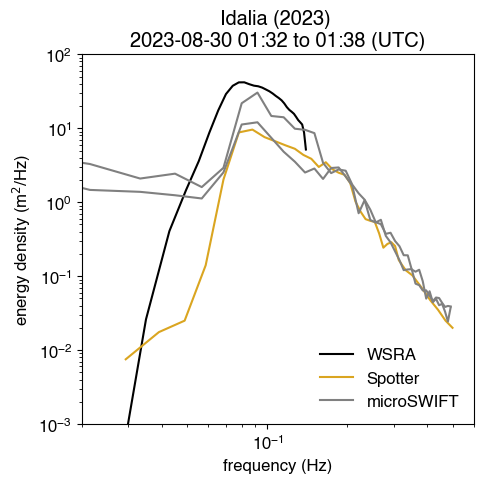

In [17]:
FIG_TITLE = f"idalia_colocated_spotter_and_microswift_spectra"
FIG_SIZE = (5, 5)
IMAGE_RESOLUTION = 300
IMAGE_FILE_TYPE = 'png'

def plot_colocated_spectra_by_subset(merged_subset_ds):
    try:
        spotter_ids = merged_subset_ds['spotter_mean_square_slope'].dropna(dim='spotter_id', how='all')['spotter_id']
    except KeyError as err:
        spotter_ids = np.array([])

    try:
        microswift_ids = merged_subset_ds['microswift_mean_square_slope'].dropna(dim='microswift_id', how='all')['microswift_id']
    except KeyError as err:
        microswift_ids = np.array([])

    try:
        # swift_ids = merged_subset_ds['swift_mean_square_slope'].dropna(dim='swift_id', how='all')['swift_id']
        swift_ids = np.array([merged_subset_ds['swift_id'].values])
    except KeyError as err:
        swift_ids = np.array([])

    FIG_TITLE = case_study_filename(merged_subset_ds, subtitle='spectra_')
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    legend_handles = []

    wsra_plot = plotting.plot_wsra_frequency_spectrum(
        merged_subset_ds,
        ax=ax, mean=True,
        color='k', label='WSRA'
    )
    legend_handles.append(wsra_plot[0])

    if spotter_ids.size > 0:
        for spotter_id in spotter_ids:
            spotter_plot = plotting.plot_colocated_drifter_spectrum(
                merged_subset_ds.sel(spotter_id=spotter_id),
                drifter_type='spotter',
                label='Spotter',
                ax=ax, mean=True,
                color=plotting.get_drifter_color('spotter'),
            )
        legend_handles.append(spotter_plot[0])


    if microswift_ids.size > 0:
        for microswift_id in microswift_ids:
            microswift_plot = plotting.plot_colocated_drifter_spectrum(
                merged_subset_ds.sel(microswift_id=microswift_id),
                drifter_type='microswift', label='microSWIFT',
                ax=ax, mean=True,
                color=plotting.get_drifter_color('microswift'),
            )
        legend_handles.append(microswift_plot[0])

    if swift_ids.size > 0:
        for swift_id in swift_ids:
            swift_plot = plotting.plot_colocated_drifter_spectrum(
                merged_subset_ds, #.sel(swift_id=swift_id),
                drifter_type='swift', label='SWIFT',
                ax=ax, mean=True,
                color=plotting.get_drifter_color('swift'),
            )
        legend_handles.append(swift_plot[0])

    ax.legend(handles=legend_handles, frameon=False)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([10**(-3), 10**(2)])
    ax.set_xlim([0.02, 0.6])
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('energy density (m$^2$/Hz)')
    ax.set_title(case_study_title(merged_subset_ds))
    fig.tight_layout()
    fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)


plot_colocated_spectra_by_subset(atomic_subset_1_ds)
plot_colocated_spectra_by_subset(atomic_subset_2_ds)
plot_colocated_spectra_by_subset(atomic_subset_3_ds)
plot_colocated_spectra_by_subset(atomic_subset_4_ds)
plot_colocated_spectra_by_subset(atomic_subset_5_ds)
plot_colocated_spectra_by_subset(atomic_subset_6_ds)

plot_colocated_spectra_by_subset(ian_subset_1_ds)
plot_colocated_spectra_by_subset(ian_subset_2_ds)

plot_colocated_spectra_by_subset(idalia_subset_1_ds)
plot_colocated_spectra_by_subset(idalia_subset_2_ds)
plot_colocated_spectra_by_subset(idalia_subset_3_ds)
plot_colocated_spectra_by_subset(idalia_subset_4_ds)
plot_colocated_spectra_by_subset(idalia_subset_5_ds)

In [59]:
def estimate_slope_from_mss(
    wsra_mss,
    buoy_mss,
    wsra_max_frequency,
    buoy_max_frequency,
    energy_at_buoy_max_frequency,
):

    def root_eq(a_values, E_at_f1, f1, f2, area):
        c = E_at_f1 * f1**(4-a_values) / (a_values + 1)
        return c * (f2**(a_values+1) - f1**(a_values+1)) - area

    mss_to_slope_area = 9.81 **2 / (2 * np.pi)**4  #  mss = (2 pi)^4 / g^2  * E f^4
    difference_mss = wsra_mss - buoy_mss
    difference_slope_area = difference_mss * mss_to_slope_area
    # slope_energy_at_buoy_max_frequency = energy_at_buoy_max_frequency * buoy_max_frequency**4

    root_eq_args = (energy_at_buoy_max_frequency,
                    buoy_max_frequency,
                    wsra_max_frequency,
                    difference_slope_area)

    root_solution = scipy.optimize.root(root_eq, x0=-0.5, args=root_eq_args)
    a = root_solution.x[0]
    n = a - 4

    return n

def calculate_wsra_max_frequency(cutoff_multiplier):
    # Vandemark 2003 diffraction limit: ~3 * lambda_radar
    # Jackson 1992 diffraction limit: ~3-6 * lambda_radar
    # Hauser 2008 diffraction limit: ~2-10 * lambda_radar
    ku_wavelength = 0.02  # [m] Ku = 1.67 to 2.5 cm
    cutoff_wavenumber = 2 * np.pi / (ku_wavelength * cutoff_multiplier)  # [rad/m]
    max_angular_frequency = np.sqrt(9.81 * cutoff_wavenumber * np.tanh(cutoff_wavenumber * 10))   # w^2 = gk tanh kh
    return max_angular_frequency / (2 * np.pi)

def tail_energy_spectrum(n, f, f1, E_at_f1):
    c = E_at_f1 / (f1**n)
    return c * f**n


def check_tail_integral(n, wsra_mss, buoy_mss, wsra_max_frequency, buoy_max_frequency, energy_at_buoy_max_frequency):

    mss_to_slope_area = 9.81 **2 / (2 * np.pi)**4  #  mss = (2 pi)^4 / g^2  * E f^4
    difference_mss = wsra_mss - buoy_mss
    difference_slope_area = difference_mss * mss_to_slope_area

    tail_frequency = np.linspace(buoy_max_frequency, wsra_max_frequency, 100)
    tail_energy = tail_energy_spectrum(
        n=n,
        f=tail_frequency,
        f1=buoy_max_frequency,
        E_at_f1=energy_at_buoy_max_frequency
    )
    slope_area = np.trapz(tail_energy * tail_frequency**4, x=tail_frequency)

    print(f"Original area: {difference_slope_area.round(5)}")
    print(f"Calculated area: {slope_area.round(5)}")


def apply_estimate_slope_from_mss(merged_ds, drifter_type):

    frequency = merged_ds[f'{drifter_type}_frequency'].values
    energy_density =  merged_ds[f'{drifter_type}_energy_density'].mean(dim='time').values
    wsra_mss=merged_ds['sea_surface_mean_square_slope_median'].mean().values
    buoy_mss=merged_ds[f'{drifter_type}_mean_square_slope'].mean().values
    wsra_max_frequency = calculate_wsra_max_frequency(cutoff_multiplier=10)
    buoy_max_frequency = frequency[-1]
    energy_at_buoy_max_frequency = energy_density[-1]
    wind_speed_mean = merged_ds['met_sfmr_10m_wind_speed'].mean().values.round(2)
    time_mean = merged_ds['time'].mean().values

    n = estimate_slope_from_mss(
        wsra_mss=wsra_mss,
        buoy_mss=buoy_mss,
        wsra_max_frequency=wsra_max_frequency,
        buoy_max_frequency=buoy_max_frequency,
        energy_at_buoy_max_frequency=energy_at_buoy_max_frequency,
    )

    slope_energy_at_buoy_max_frequency = energy_at_buoy_max_frequency * buoy_max_frequency**4
    slope_energy_at_wsra_max_frequency = tail_energy_spectrum(
        n=n + 4,
        f=wsra_max_frequency,
        f1=buoy_max_frequency,
        E_at_f1=slope_energy_at_buoy_max_frequency
    )

    energy_at_wsra_max_frequency = tail_energy_spectrum(
        n=n,
        f=wsra_max_frequency,
        f1=buoy_max_frequency,
        E_at_f1=energy_at_buoy_max_frequency
    )

    drifter_id = merged_ds[f'{drifter_type}_id'].values

    tail_results = pd.DataFrame(
        index=[time_mean],
        data={
            'drifter_id': drifter_id,
            'n': n,
            'wind_speed': wind_speed_mean,
        }
    )

    tail_frequencies = [buoy_max_frequency, wsra_max_frequency]
    tail_energy = [energy_at_buoy_max_frequency, energy_at_wsra_max_frequency]
    tail_slope_energy = [slope_energy_at_buoy_max_frequency, slope_energy_at_wsra_max_frequency]

    # Check tail integrates to correct mss
    check_tail_integral(
        n,
        wsra_mss,
        buoy_mss,
        wsra_max_frequency,
        buoy_max_frequency,
        energy_at_buoy_max_frequency
    )


    FIG_TITLE = case_study_filename(merged_ds, subtitle=f'{drifter_id}_spectra_extrapolated_tail_')
    fig, ax = plt.subplots(2, 1, figsize=(6, 10))
    ax[0].plot(frequency, energy_density*frequency**4, color='k')
    ax[0].plot(tail_frequencies, tail_slope_energy,
            color='k', linestyle='--',
            label=f'slope = {(n + 4).round(2)}')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('frequency (Hz)')
    ax[0].set_ylabel('energy $\cdot$ frequency$^4$ (m$^2$Hz$^3$)')
    ax[0].set_xlim([0.02, 5])
    ax[0].legend(frameon=False)
    ax[0].annotate(
        text=(f'{drifter_id} \n'
              f'wind speed = {str(wind_speed_mean)} m/s'),
        xy=(0.99, 0.01),
        va="bottom", ha="right",
        xycoords='axes fraction',
    )
    ax[0].set_title(case_study_title(merged_ds))


    ax[1].plot(frequency, energy_density, color='k')
    ax[1].plot(tail_frequencies, tail_energy,
            color='k', linestyle='--',
            label=f'slope = {n.round(2)}')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('frequency (Hz)')
    ax[1].set_ylabel('energy density (m$^2$/Hz)')
    ax[1].set_xlim([0.02, 5])
    ax[1].legend(frameon=False)
    fig.savefig(FIG_TITLE + '.' + IMAGE_FILE_TYPE, format=IMAGE_FILE_TYPE, dpi=IMAGE_RESOLUTION)

    return tail_results

def apply_estimate_slope_from_mss_to_subset(merged_subset_ds):
    # spotter_ids = merged_subset_ds['spotter_mean_square_slope'].dropna(dim='spotter_id', how='all')['spotter_id']
    # microswift_ids = merged_subset_ds['microswift_mean_square_slope'].dropna(dim='microswift_id', how='all')['microswift_id']
    # swift_ids = np.array([merged_subset_ds['swift_id'].values])
    #TODO: make function and use in prior functions too
    try:
        spotter_ids = merged_subset_ds['spotter_mean_square_slope'].dropna(dim='spotter_id', how='all')['spotter_id']
    except KeyError as err:
        spotter_ids = np.array([])

    try:
        microswift_ids = merged_subset_ds['microswift_mean_square_slope'].dropna(dim='microswift_id', how='all')['microswift_id']
    except KeyError as err:
        microswift_ids = np.array([])

    try:
        # swift_ids = merged_subset_ds['swift_mean_square_slope'].dropna(dim='swift_id', how='all')['swift_id']
        swift_ids = np.array([merged_subset_ds['swift_id'].values])
    except KeyError as err:
        swift_ids = np.array([])

    subset_tail_results = []
    for spotter_id in spotter_ids:
        tail_result = apply_estimate_slope_from_mss(
            merged_subset_ds.sel(spotter_id=spotter_id),
            drifter_type='spotter',
        )
        subset_tail_results.append(tail_result)

    for microswift_id in microswift_ids:
        tail_result = apply_estimate_slope_from_mss(
            merged_subset_ds.sel(microswift_id=microswift_id),
            drifter_type=('microswift'),
        )
        subset_tail_results.append(tail_result)

    for swift_id in swift_ids:
        tail_result = apply_estimate_slope_from_mss(
            merged_subset_ds,#.sel(swift_id=swift_id),
            drifter_type=('swift'),
        )
        subset_tail_results.append(tail_result)
    return pd.concat(subset_tail_results)

Original area: 0.00123
Calculated area: 0.00123
Original area: 0.00111
Calculated area: 0.00111


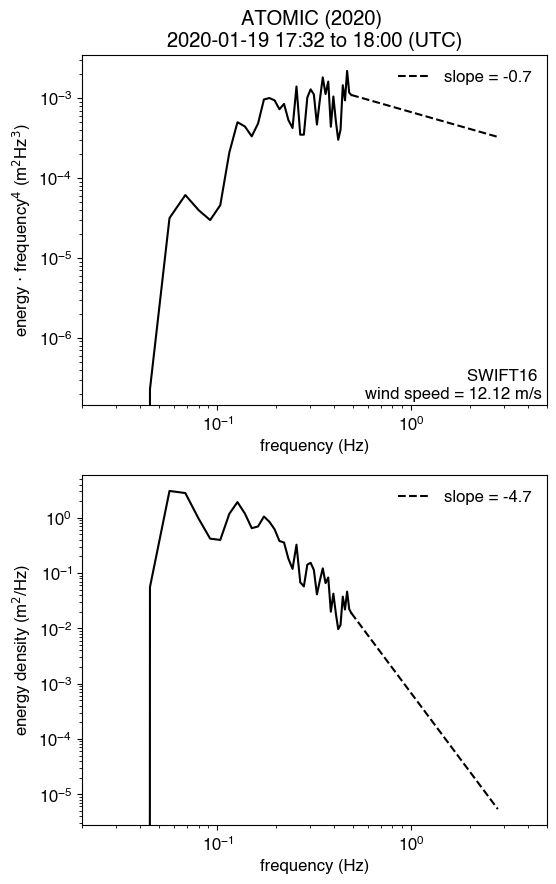

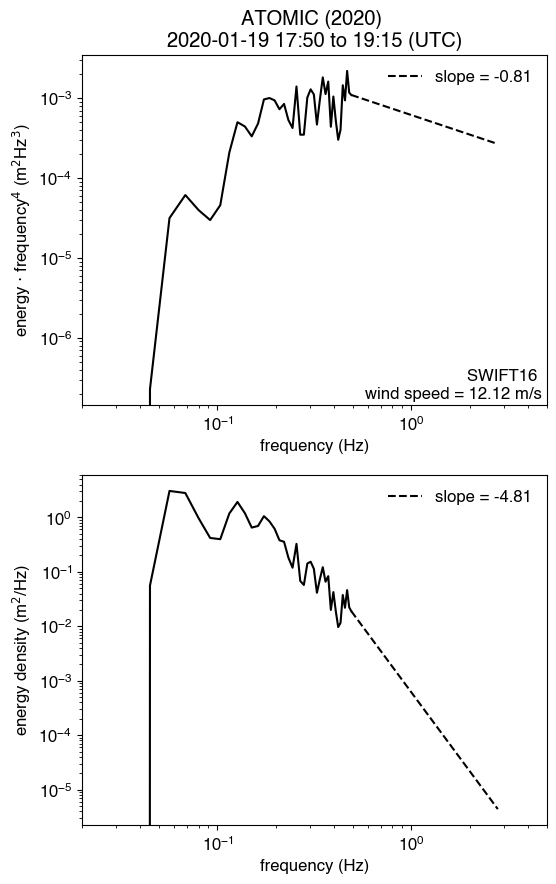

In [60]:
atomic_subset_1_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_1_ds)
atomic_subset_2_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_2_ds)
# atomic_subset_3_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_3_ds)
# atomic_subset_4_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_4_ds)
atomic_subset_5_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_5_ds)
atomic_subset_6_tail_results = apply_estimate_slope_from_mss_to_subset(atomic_subset_6_ds)

ian_subset_1_tail_results = apply_estimate_slope_from_mss_to_subset(ian_subset_1_ds)
ian_subset_2_tail_results = apply_estimate_slope_from_mss_to_subset(ian_subset_2_ds)
idalia_subset_1_tail_results = apply_estimate_slope_from_mss_to_subset(idalia_subset_1_ds)
idalia_subset_2_tail_results = apply_estimate_slope_from_mss_to_subset(idalia_subset_2_ds)
idalia_subset_3_tail_results = apply_estimate_slope_from_mss_to_subset(idalia_subset_3_ds)
idalia_subset_4_tail_results = apply_estimate_slope_from_mss_to_subset(idalia_subset_4_ds)
idalia_subset_5_tail_results = apply_estimate_slope_from_mss_to_subset(idalia_subset_5_ds)


tail_results = pd.concat([atomic_subset_1_tail_results,
                          atomic_subset_2_tail_results,
                          atomic_subset_5_tail_results,
                          atomic_subset_6_tail_results,
                          ian_subset_1_tail_results,
                          ian_subset_2_tail_results,
                          idalia_subset_1_tail_results,
                          idalia_subset_2_tail_results,
                          idalia_subset_3_tail_results,
                          idalia_subset_4_tail_results,
                          idalia_subset_5_tail_results])

In [22]:
bin_centers = np.linspace(-6, -4, 5)
bin_centers = np.linspace(-6.5, -3.5, 7)

bin_edges = np.hstack([bin_centers - 0.25, bin_centers + 0.25])
bin_edges.sort()
bin_edges

array([-6.75, -6.25, -6.25, -5.75, -5.75, -5.25, -5.25, -4.75, -4.75,
       -4.25, -4.25, -3.75, -3.75, -3.25])

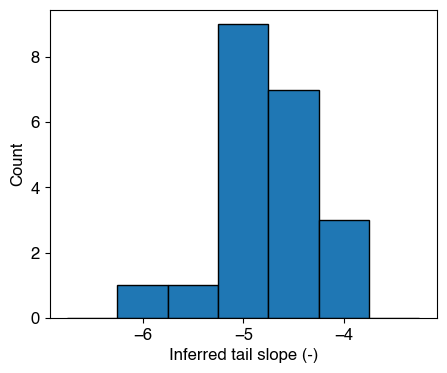

In [26]:
bin_centers = np.linspace(-6, -4, 5)
bin_centers = np.linspace(-6.5, -3.5, 7)

bin_edges = np.hstack([bin_centers - 0.25, bin_centers + 0.25])
bin_edges.sort()
bin_edges

# fig, ax = plt.subplots()
# ax.scatter(tail_results['wind_speed'], tail_results['n'])

fig, ax = plt.subplots(figsize=(5, 4))
bins = bin_edges
# bins=None
ax.hist(tail_results['n'], bins=bins, edgecolor='k')
ax.set_ylabel('Count')
ax.set_xlabel('Inferred tail slope (-)')
fig.savefig('inferred_tail_slope_histogram_smaller_binsize.png', dpi=300)

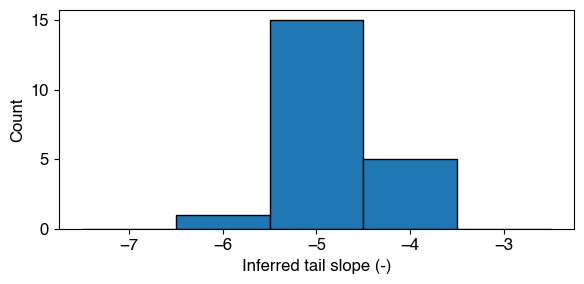

In [21]:
bin_centers = np.array([-7, -6, -5, -4, -3])

bin_edges = np.hstack([bin_centers - 0.5, bin_centers + 0.5])
bin_edges.sort()

fig, ax = plt.subplots(figsize=(6, 3))
bins = bin_edges
# bins=None
ax.hist(tail_results['n'], bins=bins, edgecolor='k')
ax.set_ylabel('Count')
ax.set_xlabel('Inferred tail slope (-)')
fig.tight_layout()
fig.savefig('inferred_tail_slope_histogram_larger_binsize.png', dpi=300)


#TODO: see Lenain 2017 figure for B(k)
#TODO: we can try this with mss as a function of U10 and spectra as a function of U10 from davis et al. (and ditch colocation)

#### Dir spectra

## Directional Moments

TypeError: Dimensions of C (361, 32) are incompatible with X (361) and/or Y (32); see help(pcolormesh)

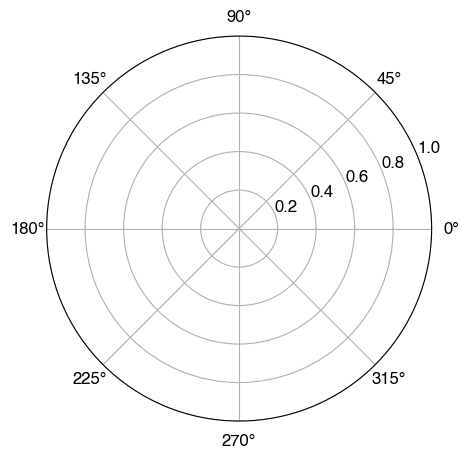

In [22]:
pywsra.plot_frequency_dir_spectrum(
    energy_density_fq_dir=idalia_subset_1_ds['frequency_direction_wave_spectrum'].mean(dim='time').values,
    direction=idalia_subset_1_ds['direction'].values,
    frequency=idalia_subset_1_ds['frequency'].values,
    ax = None,  # TODO:
)

In [ ]:
# https://github.com/SASlabgroup/NHCI-drifter-data/blob/main/example_scripts/example_model_spotter_comparison.py

I cannot view the attached powerpoint, so it is possible I missed something. However, if Angelos is looking for the directional moments (a1(f), b1(f), etc) I believe there is a further step to derive those (they're the Fourier coefficients of the directional spectrum). Specifically, if E(f, theta) is our 2D spectrum, then e(f) = sum(E(f,theta) * bin_width) is the 1D energy spectrum (e.g. what we can get from the buoy). Then,

a1(f) = sum( E(f,theta) * cos(theta) * bin_width) / e(f).
b1(f) = sum( E(f,theta) * sin(theta) * bin_width) / e(f).
a2(f) = sum( E(f,theta) * cos(2*theta) * bin_width) / e(f).
b2(f) = sum( E(f,theta) * sin(2*theta) * bin_width) / e(f).

With caution that theta is in the correct units for the function (radians for np.cos()). If you have variable bin_width, the equation should be an integration (e.g. using trapz) - sum is just easy for equivalent bin width. Hopefully this makes sense, or feel free to disregard if it was solely the numerical integration that was of issue, rather than the moment definitions. I'm trying to find a publication that documents these "first five" derived from the wave spectrum - but haven't been able to from a quick search, I'll keep looking.

In [43]:
frequency_direction_wave_spectrum = idalia_subset_1_ds['frequency_direction_wave_spectrum']
frequency_wave_spectrum = idalia_subset_1_ds['frequency_wave_spectrum']
direction = idalia_subset_1_ds['direction']

a1_integrand = frequency_direction_wave_spectrum * np.cos(direction)
idalia_subset_1_ds['a1'] = a1_integrand.integrate(coord='direction') / frequency_wave_spectrum

b1_integrand = frequency_direction_wave_spectrum * np.sin(direction)
idalia_subset_1_ds['b1'] = b1_integrand.integrate(coord='direction') / frequency_wave_spectrum

#TODO: this may be right
# a1_integrand = frequency_direction_wave_spectrum * np.cos(direction)
# idalia_subset_3_ds['a1'] = b1_integrand.integrate(coord='direction') / frequency_wave_spectrum

# b1_integrand = frequency_direction_wave_spectrum * np.sin(direction)
# idalia_subset_3_ds['b1'] = a1_integrand.integrate(coord='direction') / frequency_wave_spectrum

In [38]:
idalia_subset_1_ds['spotter_mean_square_slope'].dropna(dim='spotter_id', how='all')

<xarray.DataArray 'spotter_mean_square_slope' (spotter_id: 1, time: 21)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01361526,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan]])
Coordinates:
  * time        (time) datetime64[ns] 2023-08-30T00:50:09 ... 2023-08-30T01:0...
  * spotter_id  (spotter_id) object 'SPOT-30061D'
    time_mask   (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

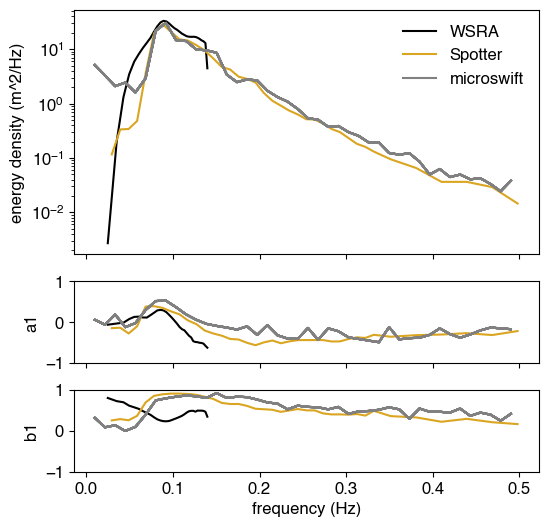

In [51]:
FIG_SIZE = (6, 6)
fig, ax = plt.subplots(3, 1, figsize=FIG_SIZE, sharex=True, height_ratios=[3, 1, 1])
# ax.plot(idalia_subset_1_ds['frequency'], idalia_subset_1_ds['a1'][100])
wsra_plot = plotting.plot_wsra_frequency_spectrum(
    idalia_subset_1_ds,
    ax=ax[0],
    mean=True,
    color='k',
    label='WSRA')
spotter_energy_plot = plotting.plot_colocated_drifter_spectrum(
    # idalia_subset_1_ds.sel(spotter_id = 'SPOT-30066D'),
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    drifter_type='spotter',
    label='Spotter',
    ax=ax[0],
    mean=False,
    color=plotting.get_drifter_color('spotter'),
)
microswift_energy_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(microswift_id = '037'),
    drifter_type='microswift',
    label='microswift',
    ax=ax[0],
    mean=False,
    color=plotting.get_drifter_color('microswift'),
)

wsra_plot = plotting.plot_wsra_frequency_spectrum(
    idalia_subset_1_ds,
    # idalia_subset_3_ds,
    ax=ax[1],
    spectral_var_name='a1',
    mean=True,
    color='k',
    label='WSRA')
a1_plot = plotting.plot_colocated_drifter_spectrum(
    # idalia_subset_3_ds.sel(spotter_id = 'SPOT-30066D'),
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    drifter_type='spotter',
    label='Spotter',
    ax=ax[1],
    spectral_var_name='a1',
    mean=False,
    color=plotting.get_drifter_color('spotter'),
)
a1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(microswift_id = '037'),
    # idalia_subset_3_ds.sel(microswift_id = '037'),
    drifter_type='microswift',
    label='microswift',
    ax=ax[1],
    spectral_var_name='a1',
    mean=False,
    color=plotting.get_drifter_color('microswift'),
)

wsra_plot = plotting.plot_wsra_frequency_spectrum(
    idalia_subset_1_ds,
    # idalia_subset_3_ds,
    ax=ax[2],
    spectral_var_name='b1',
    mean=True,
    color='k',
    label='WSRA')
b1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    # idalia_subset_3_ds.sel(spotter_id = 'SPOT-30066D'),
    drifter_type='spotter',
    label='Spotter',
    ax=ax[2],
    spectral_var_name='b1',
    mean=False,
    color=plotting.get_drifter_color('spotter'),
)
b1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(microswift_id = '037'),
    # idalia_subset_3_ds.sel(microswift_id = '037'),
    drifter_type='microswift',
    label='microswift',
    ax=ax[2],
    spectral_var_name='b1',
    mean=False,
    color=plotting.get_drifter_color('microswift'),
)
ax[0].legend(handles=[wsra_plot[0], spotter_energy_plot[0], microswift_energy_plot[0]], frameon=False)
ax[0].set_yscale('log')
ax[0].set_ylabel('energy density (m^2/Hz)')


ax[1].set_ylim([-1, 1])
ax[1].set_ylabel('a1')

ax[2].set_ylim([-1, 1])
ax[2].set_ylabel('b1')
ax[2].set_xlabel('frequency (Hz)')

fig.savefig('idalia_directional_moment_example.png', dpi=300)

In [ ]:
FIG_SIZE = (6, 3)
fig, ax = plt.subplots(2, 1, figsize=FIG_SIZE, sharex=True)
# ax.plot(idalia_subset_1_ds['frequency'], idalia_subset_1_ds['a1'][100])
wsra_plot = plotting.plot_wsra_frequency_spectrum(
    idalia_subset_1_ds,
    ax=ax[0],
    spectral_var_name='a1',
    mean=True,
    color='k',
    label='WSRA')
a1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    drifter_type='spotter',
    label='Spotter',
    ax=ax[0],
    spectral_var_name='a1',
    mean=False,
    color=plotting.get_drifter_color('spotter'),
)
a1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(microswift_id = '029'),
    drifter_type='microswift',
    label='microswift',
    ax=ax[0],
    spectral_var_name='a1',
    mean=False,
    color=plotting.get_drifter_color('microswift'),
)

wsra_plot = plotting.plot_wsra_frequency_spectrum(
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    ax=ax[1],
    spectral_var_name='b1',
    mean=True,
    color='k',
    label='WSRA')
b1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(spotter_id = 'SPOT-30061D'),
    drifter_type='spotter',
    label='Spotter',
    ax=ax[1],
    spectral_var_name='b1',
    mean=False,
    color=plotting.get_drifter_color('spotter'),
)
b1_plot = plotting.plot_colocated_drifter_spectrum(
    idalia_subset_1_ds.sel(microswift_id = '029'),
    drifter_type='microswift',
    label='microswift',
    ax=ax[1],
    spectral_var_name='b1',
    mean=False,
    color=plotting.get_drifter_color('microswift'),
)
ax[0].set_ylim([-1, 1])
ax[1].set_ylim([-1, 1])
# ax.legend(frameon=False)
# ax.set_yscale('log')
# ax.set_xscale('log')

In [ ]:
fig, ax = plt.subplots()
ax.plot(
    np.tile(idalia_subset_ds['frequency'], (idalia_subset_ds['time'].size, 1)).T,
    idalia_subset_ds['frequency_wave_spectrum'].T #.mean(axis=0),
)
ax.plot(
    np.tile(idalia_subset_ds['spotter_frequency'], (idalia_subset_ds['spotter_id'].size, 1)).T,
    idalia_subset_ds['spotter_energy_density'].mean(axis=1).T,
    color='k'
)
ax.plot(
    # np.tile(idalia_subset_ds['microswift_frequency'], (idalia_subset_ds['microswift_id'].size, 1)).T,
    # idalia_subset_ds['microswift_energy_density'].mean(axis=1).T,
    idalia_subset_ds['microswift_frequency'],
    idalia_subset_ds['microswift_energy_density'][1].mean(axis=0),
    color='r'
)
ax.set_yscale('log')

# date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
# ax.set_title(date_str)
# ax.legend(handles=create_legend_elements())
ax.set_ylim([10**(-3), 10**(2)])
ax.set_ylim([10**(-3), 10**(2)])

### Earl (2022)

In [ ]:
.loc SPOT-1207
notnull = earl_merged_ds['SPOT-1207_latitude'].notnull()
earl_merged_ds.where(notnull)
# earl_merged_ds.sel(time=slice(start_time, end_time))

extent = (-70, -60, 16, 40)  #(<min longitude>, <max longitude>, <min latitude>, <max latitude>)
ax = earl_merged_ds.where(notnull).wsra.plot(plot_best_track=True, extent=extent)
#TODO: plot colocated buoys and WSRA track.
#TODO: need to fix plotting for PyWSRA
ax.scatter(earl_merged_ds['SPOT-1207_longitude'],
           earl_merged_ds['SPOT-1207_latitude'],
           color='r')

ax = earl_merged_ds.sel(time=slice(start_time, end_time)).wsra.plot(plot_best_track=False, extent=extent, color='grey', alpha=0.5)
ax.scatter(earl_merged_ds['SPOT-1207_longitude'],
           earl_merged_ds['SPOT-1207_latitude'],
           color='r')

In [ ]:
notnull = atomic_merged_ds['swift_latitude'].notnull()
atomic_notnull_ds = atomic_merged_ds.where(notnull, drop=True)

In [ ]:
import matplotlib.pyplot as plt
start_time = pd.Timestamp('2020-02-05 00:00:0')
end_time = pd.Timestamp('2020-02-06 00:00:00')
# start_time = pd.Timestamp('2020-02-03 00:00:0')
# end_time = pd.Timestamp('2020-02-04 00:00:00')
time_slice = slice(start_time, end_time)


fig, ax = plt.subplots()
ax.plot(
    atomic_notnull_ds['frequency'],
    atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
)
ax.plot(
    atomic_notnull_ds['swift_freq'],
    atomic_notnull_ds.sel(time=time_slice)['swift_energy'].mean(axis=1),
)
# ax.set_xscale('log')
ax.set_yscale('log')

# date_str = pd.Timestamp(date).strftime('%Y-%m-%d')
# ax.set_title(date_str)
# ax.legend(handles=create_legend_elements())
ax.set_ylim([10**(-3), 10**(2)])
ax.set_ylim([10**(-3), 10**(2)])

    atomic_notnull_ds['frequency'],
    atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
)

#TODO: test this feature.  Need to extend frequency array f
pywsra.plot_frequency_dir_spectrum(
    energy_density_fq_dir = atomic_notnull_ds.sel(time=time_slice)['frequency_wave_spectrum'].mean(axis=0),
    wsra_in_hour['wavenumber_east'].values,
    wsra_in_hour['wavenumber_north'].values,
    ax=ax,
    color='k',
)

    energy_density_fq_dir,  #TODO: update types
    direction,
    frequency,

In [ ]:
#TODO: this needs to be applied as a ufunc I think? Or a loop but not good
fq_dir_spectrum = pywsra.wn_spectrum_to_fq_dir_spectrum(
    energy=atomic_colocated_ds['directional_wave_spectrum'][100:102].transpose('wavenumber_east', 'wavenumber_north', 'time').values,
    wavenumber_east=atomic_colocated_ds['wavenumber_east'].values,
    wavenumber_north=atomic_colocated_ds['wavenumber_north'].values,
    # depth float = 1000.0,  #TODO: np.inf?
    regrid=True,
    directional_resolution=1,
)
energy_density_fq_dir, direction, frequency = fq_dir_spectrum

# new_ds = self._obj.assign_coords({'frequency': frequency,
#                                     'direction': direction})

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(atomic_ds['direction'], # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    atomic_ds['frequency'],
                    atomic_ds['frequency_wave_spectrum'][100],
                    shading='gouraud',
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    np.squeeze(energy_density_fq_dir[:,:,0])
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    atomic_ds['frequency_wave_spectrum'][100],
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

In [ ]:
atomic_colocated_ds['secondary_wave_direction'][99]

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    np.moveaxis(energy_density_fq_dir, -1, 0)[0]
                    # **pcm_kwargs
                    )

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')



In [ ]:
# energy_density_fq_dir.shape

In [ ]:
fig = plt.figure(figsize=(5, 5))  # plt.gcf()
ax = fig.add_subplot(1, 1, 1, projection='polar')
pcm = ax.pcolormesh(direction, # (-direction_noregrid + np.pi/2) % (2 * np.pi),
                    frequency,
                    energy_density_fq_dir[:, :, 0],
                    shading='gouraud')

                    # **pcm_kwargs)

ax.set_theta_zero_location("N")  # theta=0 at the top  #TODO: need to reconvert convention when plotting
ax.set_theta_direction(-1)  # +CW
cbar = plt.gcf().colorbar(pcm, pad=0.15, shrink=0.75)
cbar.set_label('energy density (m^2/Hz/rad)')

### Store

In [ ]:
%%capture

%store earl_merged_ds
%store fiona_merged_ds
%store ian_merged_ds
%store julia_merged_ds
%store idalia_merged_ds
%store lee_merged_ds
%store atomic_merged_ds

%store all_wsra_df
%store atomic_df